<h1>German car market analysis</h1>

<h2>Table of Contents</h2>

<div>
<ol>
    <li><a href="#Business-case">Business case</a>
    <li><a href="#Data-description">Data description</a>
    <li><a href="#Basic-data-insights">Basic data insights</a></li>
    <li><a href="#Visualize-Data-per-Map">Visualize Data per Map</a>
    <li><a href="#Choose-important-columns-and-handle-missing-data">Choose important columns and handle missing data</a>
    <ol>
        <li><a href="#Transform-features-list">Transform features list</a></li>
        <li><a href="#Business-and-private-sales">Business and private sales</a></li>
        <li><a href="#Summarize-fuel">Summarize fuel</a></li>
        <li><a href="#Transform-car-category">Transform car category</a></li>
        <li><a href="#Dummy-variables">Dummy variables</a></li>
    </ol>
    <li><a href="#Correlation">Correlation</a></li>
    <li><a href="#Explorative-analysis">Explorative analysis</a>
    <ol>
        <li><a href="#Numerical-variables">Numerical variables</a></li>
        <li><a href="#Categorical-variables">Categorical variables</a></li>
    </ol>
    <li><a href="#Descriptive-statistics">Descriptive statistics</a>
    <ol>
        <li><a href="#Parameter">Parameter</a></li>
        <li><a href="#Value-Counts">Value counts</a></li>
        <li><a href="#Grouping">Grouping</a></li>
    </ol>
    <li><a href="#Correlation">Correlation</a></li>
    <li><a href="#Feature-scaling">Feature scaling</a>
    <ol>
        <li><a href="#Standardization">Standardization</a></li>
        <li><a href="#Normalization">Normalization</a></li>
    </ol>
    <li><a href="#Regression-analysis">Regression analysis</a>
    <ol>
        <li><a href="#Split-data">Split Data</a></li>
        <li><a href="#Linear-Regression">Linear Regression</a></li>
        <li><a href="#Polynominal-Regression">Polynominal Regression</a></li>
        <li><a href="#Decision-Tree">Decision Tree</a></li>
        <li><a href="#Random-Forest-Regression">Random Forest Regression</a></li>
        <li><a href="#Comparison">Comparison</a></li>
    </ol>
</ol>

</div>

<h2>Business case</h2>

The goal of our analysis is that we develop a model to predict the price of a BMW. The car should be a sedan.<br>


<h2>Data description</h2>

The data came from a leading German used car market platform. It was scraped using scrapy and other packages on May 5, 2018.<br>
The data is stored as a CSV file and has a size of about 1.4 GB.

In [1]:
# Imports
import warnings
import folium
import geopandas as gpd
import branca.colormap as cm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import ensemble
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mobile_database_5_5_2018.csv')

<h2>Basic data insights</h2>

To get a better understanding of the data we take a look at the top five and bottom five rows at first.

In [3]:
df.head()

,airbags,number_photos,description,owner,specification,car_category,car_heritage,car_rating,car_url,co2,...,scraper_start,seats,doors,title,consumption_out,consumption_in,consumption_comb,registration_year,registration_month,condition
0,NaN,16.0,63.0,3.0,Abarth Andere,Sportwagen / Coupé; Oldtimer,NaN,3.3,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,2.0,2/3,Abarth A112 Lancia,NaN,NaN,NaN,1985.0,1.0,Unfallfrei
1,NaN,12.0,36.0,1.0,Abarth Andere,Kleinwagen,NaN,3.3,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,4.0,2/3,Abarth 112 AUTOBINACHI ORGINAL ZUSTAND 11057KM,NaN,NaN,NaN,1985.0,5.0,Unfallfrei
2,NaN,15.0,40.0,3.0,Abarth Andere,Sportwagen / Coupé; Oldtimer,NaN,3.3,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,5.0,2/3,Abarth Fiat Ritmo 130 TC,NaN,NaN,NaN,1987.0,10.0,Unfallfrei
3,NaN,16.0,NaN,NaN,Abarth 595,Kleinwagen; Oldtimer,NaN,3.3,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,4.0,2/3,Abarth 595 - H Kennzeichen - Top Zustand,NaN,NaN,NaN,1974.0,7.0,NaN
4,NaN,14.0,76.0,2.0,Abarth Andere,Sportwagen / Coupé; Oldtimer,EU-Ausführung,3.3,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,2.0,2/3,Abarth Fiat 124 Abarth Rally Stradale Perfekt,NaN,NaN,NaN,1975.0,2.0,Unfallfrei


In [4]:
df.tail()

,airbags,number_photos,description,owner,specification,car_category,car_heritage,car_rating,car_url,co2,...,scraper_start,seats,doors,title,consumption_out,consumption_in,consumption_comb,registration_year,registration_month,condition
1215877,NaN,8.0,82.0,NaN,Andere Andere,Andere,NaN,NaN,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,NaN,NaN,Andere Kofferanhänger,NaN,NaN,NaN,2014.0,4.0,NaN
1215878,NaN,15.0,27.0,NaN,Andere Andere,Andere,NaN,NaN,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,1.0,NaN,Andere Elektromobil Scooter Mobilis M83 XL,NaN,NaN,NaN,2014.0,10.0,NaN
1215879,NaN,16.0,NaN,1.0,Andere Andere,Van / Minibus,NaN,NaN,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,2.0,4/5,Andere Dongfeng MINI VAN 1.3 Benzin,NaN,NaN,NaN,2014.0,4.0,NaN
1215880,NaN,16.0,1.0,NaN,Andere Andere,Kleinwagen,EU-Ausführung,NaN,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,NaN,2/3,Andere Zero Elektro,NaN,NaN,NaN,2014.0,3.0,NaN
1215881,NaN,4.0,130.0,NaN,Andere Andere,Andere,NaN,NaN,https://suchen.mobile.de/fahrzeuge/details.htm...,NaN,...,5_5_2018,NaN,NaN,Andere GoKart Praga,NaN,NaN,NaN,2014.0,1.0,NaN


In [5]:
df.columns

Index(['airbags', 'number_photos', 'description', 'owner', 'specification',
       'car_category', 'car_heritage', 'car_rating', 'car_url', 'co2', 'date',
       'efficiency_class', 'emission_class', 'color', 'features_list',
       'transmission', 'business', 'trader_zip', 'trader_city',
       'trader_street', 'inspection_year', 'inspection_month', 'engine_size',
       'id_nr', 'interior_color', 'interior_fabric', 'kilometer', 'ac', 'fuel',
       'maker', 'maker_id', 'model', 'parkassist', 'bagde', 'price',
       'price_rating', 'hp', 'scraper_start', 'seats', 'doors', 'title',
       'consumption_out', 'consumption_in', 'consumption_comb',
       'registration_year', 'registration_month', 'condition'],
      dtype='object')

In [6]:
df.shape

(1215882, 47)

<h2>Visualize Data per Map</h2>

In [7]:
df_geo = df[['trader_zip', 'price']].dropna().reset_index(drop=True).rename(columns={'trader_zip': 'postcode'})
df_geo['postcode'] = df_geo['postcode'].astype(int)
df_geo['postcode'] = df_geo['postcode'].astype(str)
df_geo['postcode'] = df_geo['postcode'].str.zfill(5)
car_prices_geo = df_geo[['price', 'postcode']].groupby(by=['postcode']).agg("mean").reset_index(drop=False)
car_prices_geo = car_prices_geo[car_prices_geo['postcode'] != '00000']

In [8]:
# Colormap
colormap = cm.LinearColormap(colors=['green','red'], vmin=car_prices_geo['price'].min(), vmax=car_prices_geo['price'].sort_values()[:9100].max())

germany_zips = gpd.read_file("postleitzahlen.geojson")
house_map = germany_zips.merge(car_prices_geo, on="postcode")

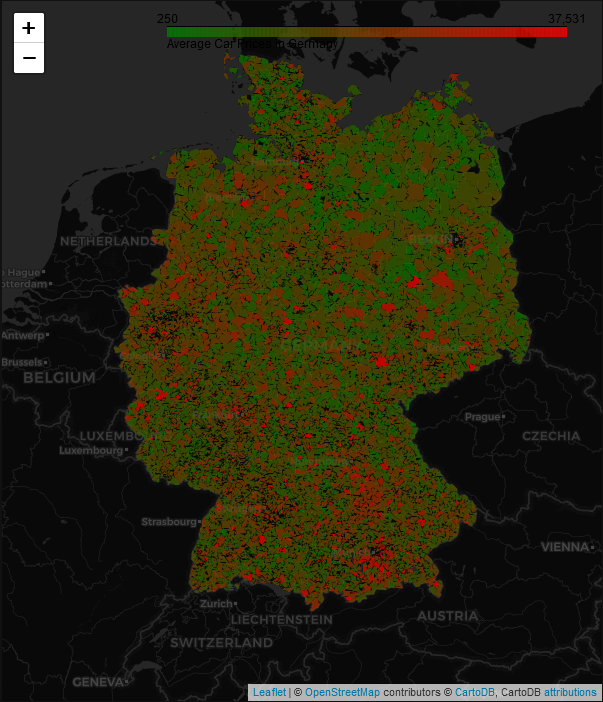

In [9]:
f = folium.Figure(width=600, height=700)
colormap.caption = 'Average Car Prices in Germany'
germany_map = folium.Map(location=[51, 10], zoom_start=6.4, tiles=None).add_to(f)
folium.TileLayer('cartodbdark_matter', name='Dark Map', control=False).add_to(germany_map)
style_function = lambda x: {'weight': 0, 'color': 'black', 'fillColor': colormap(x['properties']['price']), 'fillOpacity': 0.75}
highlight_function = lambda x: {'fillColor': '#000000', 'color': '#000000', 'fillOpacity': 0.50, 'weight': 0.1}
info=folium.features.GeoJson(
    house_map, 
    style_function=style_function, 
    control=False, 
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['postcode', 'price'], 
        aliases=['ZIP Code: ', 'Average Car Price'],
        sticky=True
        )
    )
colormap.add_to(germany_map)
germany_map.add_child(info)
germany_map

<h2>Choose important columns and handle missing data</h2>

As seen below there are a lot of columns which are not useful for us. Furthermore, we have a few columns we want to transform to dummy variables. For that reason we will drop some columns.
But before we start with that, we are going to handle the missing data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215882 entries, 0 to 1215881
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   airbags             972838 non-null   object 
 1   number_photos       1194349 non-null  float64
 2   description         1086725 non-null  float64
 3   owner               862328 non-null   float64
 4   specification       1215736 non-null  object 
 5   car_category        1215882 non-null  object 
 6   car_heritage        462666 non-null   object 
 7   car_rating          1199451 non-null  float64
 8   car_url             1215882 non-null  object 
 9   co2                 990536 non-null   float64
 10  date                1215882 non-null  object 
 11  efficiency_class    364313 non-null   object 
 12  emission_class      1035439 non-null  object 
 13  color               1076066 non-null  object 
 14  features_list       1215882 non-null  object 
 15  transmission   

In [11]:
cols_to_analyze = [
    'price', 'hp', 'engine_size', 'car_rating', 
    'registration_year', 'kilometer',
    'car_category', 'color', 'transmission', 'business', 
    'ac', 'fuel', 'maker', 'condition', 'features_list'
]
df = df[cols_to_analyze]
df = df.dropna()

In [12]:
df.shape

(580056, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580056 entries, 1 to 1213932
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              580056 non-null  int64  
 1   hp                 580056 non-null  float64
 2   engine_size        580056 non-null  float64
 3   car_rating         580056 non-null  float64
 4   registration_year  580056 non-null  float64
 5   kilometer          580056 non-null  float64
 6   car_category       580056 non-null  object 
 7   color              580056 non-null  object 
 8   transmission       580056 non-null  object 
 9   business           580056 non-null  object 
 10  ac                 580056 non-null  object 
 11  fuel               580056 non-null  object 
 12  maker              580056 non-null  object 
 13  condition          580056 non-null  object 
 14  features_list      580056 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 7

<h3>Transform features list</h3>

The values in the column features_list are a python list saved as a string. The pandas function `get_dummies` doesn't work here.

In [14]:
liste_features = [
            'ABS', 'Allradantrieb', 'Anhängerkupplung', 'Behindertengerecht', 'Bluetooth', 'Bordcomputer', 
            'CD-Spieler', 'Dachreling', 'Elektr. Fensterheber', 'Elektr. Seitenspiegel', 'Elektr. Sitzeinstellung', 
            'Elektr. Wegfahrsperre', 'ESP', 'Freisprecheinrichtung', 'Garantie', 'Head-Up Display', 
            'Isofix (Kindersitzbefestigung)', 'Kurvenlicht', 'Lederausstattung', 'Leichtmetallfelgen', 'Lichtsensor', 
            'MP3-Schnittstelle', 'Multifunktionslenkrad', 'Navigationssystem', 'Nebelscheinwerfer', 
            'Nichtraucher-Fahrzeug', 'Panorama-Dach', 'Partikelfilter', 'Regensensor', 'Scheckheftgepflegt', 
            'Schiebedach', 'Servolenkung', 'Sitzheizung', 'Skisack', 'Sportfahrwerk', 'Sportpaket', 'Sportsitze', 
            'Standheizung', 'Start/Stopp-Automatik', 'Tagfahrlicht', 'Taxi', 'Tempomat', 'Traktionskontrolle', 
            'Tuner/Radio', 'Xenonscheinwerfer', 'Zentralverriegelung'
        ]

for i in liste_features:
    df[i] = 0
    
for i in liste_features:
    df.loc[[df[df['features_list'].str.contains(i) == True].index][0], [i]] = 1
    
df = df.rename(
    columns={
        'Anhängerkupplung': 'Anhaengerkupplung', 'CD-Spieler': 'CD_Spieler',
        'Elektr. Fensterheber': 'Elektr_Fensterheber',
        'Elektr. Seitenspiegel': 'Elektr_Seitenspiegel',
        'Elektr. Sitzeinstellung': 'Elektr_Sitzeinstellung',
        'Elektr. Wegfahrsperre': 'Elektr_Wegfahrsperre',
        'Head-Up Display': 'HeadUp_Display', 'Isofix (Kindersitzbefestigung)': 'Isofix',
        'MP3-Schnittstelle': 'MP3_Schnittstelle',
        'Nichtraucher-Fahrzeug': 'Nichtraucher_Fahrzeug',
        'Panorama-Dach': 'Panorama_Dach', 'Start_Stopp-Automatik': 'Start_Stopp_Automatik'
    }
)

del df['features_list']

In [15]:
df.shape

(580056, 60)

In [16]:
df.head()

,price,hp,engine_size,car_rating,registration_year,kilometer,car_category,color,transmission,business,...,Sportsitze,Standheizung,Start/Stopp-Automatik,Tagfahrlicht,Taxi,Tempomat,Traktionskontrolle,Tuner/Radio,Xenonscheinwerfer,Zentralverriegelung
1,14000,69.0,1049.0,3.3,1985.0,11057.0,Kleinwagen,Schwarz,Schaltgetriebe,Privatanbieter,...,0,0,0,0,0,0,0,0,0,0
10,14000,69.0,1049.0,3.3,1985.0,11057.0,Kleinwagen,Schwarz,Schaltgetriebe,Privatanbieter,...,0,0,0,0,0,0,0,0,0,0
22,19990,72.0,1050.0,3.3,1973.0,9999.0,Kleinwagen,Blau,Schaltgetriebe,collection-car GmbH,...,1,0,0,0,0,0,0,0,0,0
25,4950,170.0,2446.0,3.3,2002.0,90489.0,Andere,Blau Metallic,Automatik,Autohaus Müller GmbH,...,0,0,0,0,0,1,0,0,0,1
30,12499,170.0,1368.0,3.3,2011.0,93000.0,Cabrio / Roadster,Grau Metallic,Automatik,Privatanbieter,...,1,0,0,1,0,0,1,1,1,1


<h3>Business and private sales</h3>

The values in the column are private offerings or the name of the business seller. We don't need the name of the company, only the information if it's a private or commercial offering is important.

In [17]:
df['commercial'] = 1
df.loc[[df['business'][df['business'] == 'Privatanbieter'].index][0], ['commercial']] = 0

<h3>Summarize fuel</h3>

We want only the following fuel types:
* Andere
* Autogas
* Benzin
* Diesel
* Elektro
* Erdgas
* Ethanol
* Gas
* Hybrid
* Wasserstoff

In [18]:
df.loc[[df['fuel'][df['fuel'] == 'Andere; E10-geeignet'].index][0], ['fuel']] = 'Andere'
df.loc[[df['fuel'][df['fuel'] == 'Andere; Pflanzenöl geeignet'].index][0], ['fuel']] = 'Andere'
df.loc[[df['fuel'][df['fuel'] == 'Andere; E10-geeignet; Plug-in-Hybrid'].index][0], ['fuel']] = 'Andere'
df.loc[[df['fuel'][df['fuel'] == 'Andere; Plug-in-Hybrid'].index][0], ['fuel']] = 'Andere'
df.loc[[df['fuel'][df['fuel'] == 'Autogas (LPG)'].index][0], ['fuel']] = 'Autogas'
df.loc[[df['fuel'][df['fuel'] == 'Autogas (LPG); E10-geeignet'].index][0],['fuel']] = 'Autogas'
df.loc[[df['fuel'][df['fuel'] == 'Benzin; Biodiesel geeignet'].index][0], ['fuel']] = 'Benzin'
df.loc[[df['fuel'][df['fuel'] == 'Benzin; Biodiesel geeignet; E10-geeignet'].index][0], ['fuel']] = 'Benzin'
df.loc[[df['fuel'][df['fuel'] == 'Benzin; E10-geeignet'].index][0], ['fuel']] = 'Benzin'
df.loc[[df['fuel'][df['fuel'] == 'Benzin; E10-geeignet; Plug-in-Hybrid'].index][0], ['fuel']] = 'Benzin'
df.loc[[df['fuel'][df['fuel'] == 'Benzin; Plug-in-Hybrid'].index][0], ['fuel']] = 'Benzin'
df.loc[[df['fuel'][df['fuel'] == 'Diesel; Biodiesel geeignet'].index][0], ['fuel']] = 'Diesel'
df.loc[[df['fuel'][df['fuel'] == 'Diesel; Biodiesel geeignet; E10-geeignet'].index][0], ['fuel']] = 'Diesel'
df.loc[[df['fuel'][df['fuel'] == 'Diesel; E10-geeignet'].index][0], ['fuel']] = 'Diesel'
df.loc[[df['fuel'][df['fuel'] == 'Diesel; Biodiesel geeignet; Pflanzenöl geeignet'].index][0], ['fuel']] = 'Diesel'
df.loc[[df['fuel'][df['fuel'] == 'Diesel; Pflanzenöl geeignet'].index][0],['fuel']] = 'Diesel'
df.loc[[df['fuel'][df['fuel'] == 'Diesel; Plug-in-Hybrid'].index][0], ['fuel']] = 'Diesel'
df.loc[[df['fuel'][df['fuel'] == 'Elektro; Biodiesel geeignet'].index][0],['fuel']] = 'Elektro'
df.loc[[df['fuel'][df['fuel'] == 'Elektro; Plug-in-Hybrid'].index][0], ['fuel']] = 'Elektro'
df.loc[[df['fuel'][df['fuel'] == 'Elektro; E10-geeignet; Plug-in-Hybrid'].index][0], ['fuel']] = 'Elektro'
df.loc[[df['fuel'][df['fuel'] == 'Elektro; E10-geeignet'].index][0], ['fuel']] = 'Elektro'
df.loc[[df['fuel'][df['fuel'] == 'Erdgas (CNG)'].index][0], ['fuel']] = 'Erdgas'
df.loc[[df['fuel'][df['fuel'] == 'Erdgas (CNG); Biodiesel geeignet; E10-geeignet'].index][0], ['fuel']] = 'Erdgas'
df.loc[[df['fuel'][df['fuel'] == 'Erdgas (CNG); E10-geeignet'].index][0], ['fuel']] = 'Erdgas'
df.loc[[df['fuel'][df['fuel'] == 'Ethanol (FFV; E85 etc.)'].index][0], ['fuel']] = 'Ethanol'
df.loc[[df['fuel'][df['fuel'] == 'Ethanol (FFV; E85 etc.); E10-geeignet'].index][0], ['fuel']] = 'Ethanol'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Benzin/Elektro)'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Benzin/Elektro); Plug-in-Hybrid'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Diesel / Elektro)'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Benzin/Elektro); Biodiesel geeigne'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Diesel / Elektro); Biodiesel geeignet'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Benzin/Elektro); Biodiesel geeignet; Plug-in-Hybrid'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Diesel / Elektro); Pflanzenöl geeignet; Plug-in-Hybrid'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Diesel / Elektro); Plug-in-Hybrid'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Benzin/Elektro); E10-geeignet'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Benzin/Elektro); E10-geeignet; Plug-in-Hybrid'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Diesel / Elektro); Biodiesel geeignet; Pflanzenöl geeignet; Plug-in-Hybrid'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Diesel / Elektro); E10-geeignet'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid; Plug-in-Hybrid'].index][0], ['fuel']] = 'Hybrid'
df.loc[[df['fuel'][df['fuel'] == 'Hybrid (Benzin/Elektro); Biodiesel geeignet'].index][0], ['fuel']] = 'Hybrid'

<h3>Transform car category</h3>

We want only the following fuel types

In [19]:
df['Oldtimer'] = 0
df['Jahreswagen'] = 0
df['Tageszulassung'] = 0
df['Vorfuehrfahrzeug'] = 0
df['Neufahrzeug'] = 0

# Jahreswagen
df.loc[[df['car_category'][df['car_category'] == 'Andere; Jahreswagen'].index][0], ['Jahreswagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Jahreswagen'].index][0], ['Jahreswagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Jahreswagen'].index][0], ['Jahreswagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Jahreswagen'].index][0], ['Jahreswagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Jahreswagen'].index][0], ['Jahreswagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Jahreswagen'].index][0], ['Jahreswagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Jahreswagen'].index][0], ['Jahreswagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Jahreswagen'].index][0], ['Jahreswagen']] = 1

# Neufahrzeug
df.loc[[df['car_category'][df['car_category'] == 'Andere; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Neufahrzeug'].index][0], ['Neufahrzeug']] = 1

# Oldtimer
df.loc[[df['car_category'][df['car_category'] == 'Andere; Oldtimer'].index][0], ['Oldtimer']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Oldtimer'].index][0], ['Oldtimer']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Oldtimer'].index][0], ['Oldtimer']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Oldtimer'].index][0], ['Oldtimer']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Oldtimer'].index][0], ['Oldtimer']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Oldtimer'].index][0], ['Oldtimer']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Oldtimer'].index][0], ['Oldtimer']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Oldtimer'].index][0], ['Oldtimer']] = 1

# Tageszulassung
df.loc[[df['car_category'][df['car_category'] == 'Andere; Tageszulassung'].index][0], ['Tageszulassung']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Tageszulassung'].index][0], ['Tageszulassung']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Tageszulassung'].index][0], ['Tageszulassung']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Tageszulassung'].index][0], ['Tageszulassung']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Tageszulassung'].index][0], ['Tageszulassung']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Tageszulassung'].index][0], ['Tageszulassung']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Tageszulassung'].index][0], ['Tageszulassung']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Tageszulassung'].index][0], ['Tageszulassung']] = 1

# Vorfuehrfahrzeug
df.loc[[df['car_category'][df['car_category'] == 'Andere; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Vorführfahrzeug'].index][0], ['Vorfuehrfahrzeug']] = 1

# Andere
df.loc[[df['car_category'][df['car_category'] == 'Andere; Jahreswagen'].index][0], ['car_category']] = 'Andere'
df.loc[[df['car_category'][df['car_category'] == 'Andere; Neufahrzeug'].index][0], ['car_category']] = 'Andere'
df.loc[[df['car_category'][df['car_category'] == 'Andere; Oldtimer'].index][0], ['car_category']] = 'Andere'
df.loc[[df['car_category'][df['car_category'] == 'Andere; Tageszulassung'].index][0], ['car_category']] = 'Andere'
df.loc[[df['car_category'][df['car_category'] == 'Andere; Vorführfahrzeug'].index][0], ['car_category']] = 'Andere'

# Cabrio / Roadster
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Jahreswagen'].index][0], ['car_category']] = 'Cabrio / Roadster'
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Neufahrzeug'].index][0], ['car_category']] = 'Cabrio / Roadster'
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Oldtimer'].index][0], ['car_category']] = 'Cabrio / Roadster'
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Tageszulassung'].index][0], ['car_category']] = 'Cabrio / Roadster'
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster; Vorführfahrzeug'].index][0], ['car_category']] = 'Cabrio / Roadster'

# Geländewagen / Pickup
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Jahreswagen'].index][0], ['car_category']] = 'Geländewagen / Pickup'
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Neufahrzeug'].index][0], ['car_category']] = 'Geländewagen / Pickup'
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Oldtimer'].index][0], ['car_category']] = 'Geländewagen / Pickup'
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Tageszulassung'].index][0], ['car_category']] = 'Geländewagen / Pickup'
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup; Vorführfahrzeug'].index][0], ['car_category']] = 'Geländewagen / Pickup'

# Kleinwagen
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Jahreswagen'].index][0], ['car_category']] = 'Kleinwagen'
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Neufahrzeug'].index][0], ['car_category']] = 'Kleinwagen'
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Oldtimer'].index][0], ['car_category']] = 'Kleinwagen'
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Tageszulassung'].index][0], ['car_category']] = 'Kleinwagen'
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen; Vorführfahrzeug'].index][0], ['car_category']] = 'Kleinwagen'

# Kombi
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Jahreswagen'].index][0], ['car_category']] = 'Kombi'
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Neufahrzeug'].index][0], ['car_category']] = 'Kombi'
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Oldtimer'].index][0], ['car_category']] = 'Kombi'
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Tageszulassung'].index][0], ['car_category']] = 'Kombi'
df.loc[[df['car_category'][df['car_category'] == 'Kombi; Vorführfahrzeug'].index][0], ['car_category']] = 'Kombi'

# Limousine
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Jahreswagen'].index][0], ['car_category']] = 'Limousine'
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Neufahrzeug'].index][0], ['car_category']] = 'Limousine'
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Oldtimer'].index][0], ['car_category']] = 'Limousine'
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Tageszulassung'].index][0], ['car_category']] = 'Limousine'
df.loc[[df['car_category'][df['car_category'] == 'Limousine; Vorführfahrzeug'].index][0], ['car_category']] = 'Limousine'

# Sportwagen / Coupé
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Jahreswagen'].index][0], ['car_category']] = 'Sportwagen / Coupé'
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Neufahrzeug'].index][0], ['car_category']] = 'Sportwagen / Coupé'
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Oldtimer'].index][0], ['car_category']] = 'Sportwagen / Coupé'
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Tageszulassung'].index][0], ['car_category']] = 'Sportwagen / Coupé'
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé; Vorführfahrzeug'].index][0], ['car_category']] = 'Sportwagen / Coupé'

# Van / Minibus
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Jahreswagen'].index][0], ['car_category']] = 'Van / Minibus'
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Neufahrzeug'].index][0], ['car_category']] = 'Van / Minibus'
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Oldtimer'].index][0], ['car_category']] = 'Van / Minibus'
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Tageszulassung'].index][0], ['car_category']] = 'Van / Minibus'
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus; Vorführfahrzeug'].index][0], ['car_category']] = 'Van / Minibus'

df['car_category_andere'] = 0
df['car_category_cabrio_roadster'] = 0
df['car_category_gelaendewagen'] = 0
df['car_category_kleinwagen'] = 0
df['car_category_kombi'] = 0
df['car_category_limousine'] = 0
df['car_category_sportwagen'] = 0
df['car_category_minibus'] = 0

df.loc[[df['car_category'][df['car_category'] == 'Andere'].index][0], ['car_category_andere']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Cabrio / Roadster'].index][0], ['car_category_cabrio_roadster']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Geländewagen / Pickup'].index][0], ['car_category_gelaendewagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kleinwagen'].index][0], ['car_category_kleinwagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Kombi'].index][0], ['car_category_kombi']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Limousine'].index][0], ['car_category_limousine']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Sportwagen / Coupé'].index][0], ['car_category_sportwagen']] = 1
df.loc[[df['car_category'][df['car_category'] == 'Van / Minibus'].index][0], ['car_category_minibus']] = 1

del df['car_category']

<h3>Dummy variables</h3>

We will transform the follwoing columns to dummy variables:
* color
* ac
* transmission
* condition

In [20]:
df = df[df['car_category_limousine'] == 1]
cols_to_dummy = ['color', 'transmission', 'ac', 'condition']
df = pd.get_dummies(df, columns=cols_to_dummy, drop_first=True)

In [21]:
df.head()

,price,hp,engine_size,car_rating,registration_year,kilometer,business,fuel,maker,ABS,...,transmission_Schaltgetriebe,ac_3-Zonen-Klimaautomatik,ac_4-Zonen-Klimaautomatik,ac_Keine Klimaanlage oder -automatik,ac_Klimaanlage,ac_Klimaautomatik,condition_Reparierter Unfallschaden,condition_Reparierter Unfallschaden; Nicht fahrtauglich,condition_Unfallfrei,condition_Unfallfrei; Nicht fahrtauglich
52,18999,204.0,1997.0,3.9,1991.0,23500.0,AC-Classics,Benzin,Alfa Romeo,1,...,1,0,0,0,0,1,0,0,1,0
217,9900,150.0,1767.0,3.9,1988.0,76200.0,MondänMobil,Benzin,Alfa Romeo,0,...,1,0,0,1,0,0,0,0,1,0
310,25300,72.0,1298.0,3.6,1988.0,84600.0,Privatanbieter,Benzin,Alfa Romeo,0,...,1,0,0,1,0,0,0,0,1,0
317,13190,135.0,1368.0,3.3,2013.0,41516.0,MTS Automobile GmbH,Benzin,Abarth,1,...,1,0,0,0,1,0,0,0,1,0
329,4998,88.0,1351.0,3.9,1992.0,68823.0,CaBuMo GmbH,Benzin,Alfa Romeo,0,...,1,0,0,1,0,0,0,0,1,0


In [22]:
df.maker.unique()

array(['Alfa Romeo', 'Abarth', 'Audi', 'BMW', 'Chevrolet', 'Buick',
       'Chrysler', 'Citroën', 'Corvette', 'Dacia', 'Daihatsu', 'Daewoo',
       'Fiat', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep',
       'Kia', 'Lancia', 'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz',
       'MINI', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche',
       'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Seat', 'Skoda',
       'Smart', 'Ssangyong', 'Subaru', 'Suzuki', 'Toyota', 'Tesla',
       'Volkswagen', 'Volvo'], dtype=object)

In [23]:
df_filtered = df[df['maker'] == 'BMW']

In [24]:
df_filtered.shape

(23758, 105)

<h2>Correlation</h2>

Because we still have a lot of columns, we will chosse the ones which are most correlated with our target variable "price".

In [25]:
corr = df_filtered.corr()
# Sort absolute correlation values
corr.price.abs().sort_values(ascending=False)[:15]

price                          1.000000
registration_year              0.624183
HeadUp_Display                 0.581324
kilometer                      0.579356
hp                             0.567353
Garantie                       0.459682
Kurvenlicht                    0.458643
transmission_Schaltgetriebe    0.447750
Freisprecheinrichtung          0.442122
Navigationssystem              0.440789
Bluetooth                      0.433557
Tagfahrlicht                   0.403707
Start/Stopp-Automatik          0.390274
Lichtsensor                    0.385197
Allradantrieb                  0.378168
Name: price, dtype: float64

In [26]:
interesting_cols = [
    'hp', 'engine_size', 'car_rating', 'registration_year', 'kilometer', 'price',
    'Start/Stopp-Automatik', 'Navigationssystem', 'transmission_Schaltgetriebe',
    'Bluetooth', 'Freisprecheinrichtung', 'Tagfahrlicht', 'Garantie',
    'Allradantrieb', 'Lichtsensor', 'HeadUp_Display', 'Regensensor'
]

df_filtered = df_filtered[interesting_cols]

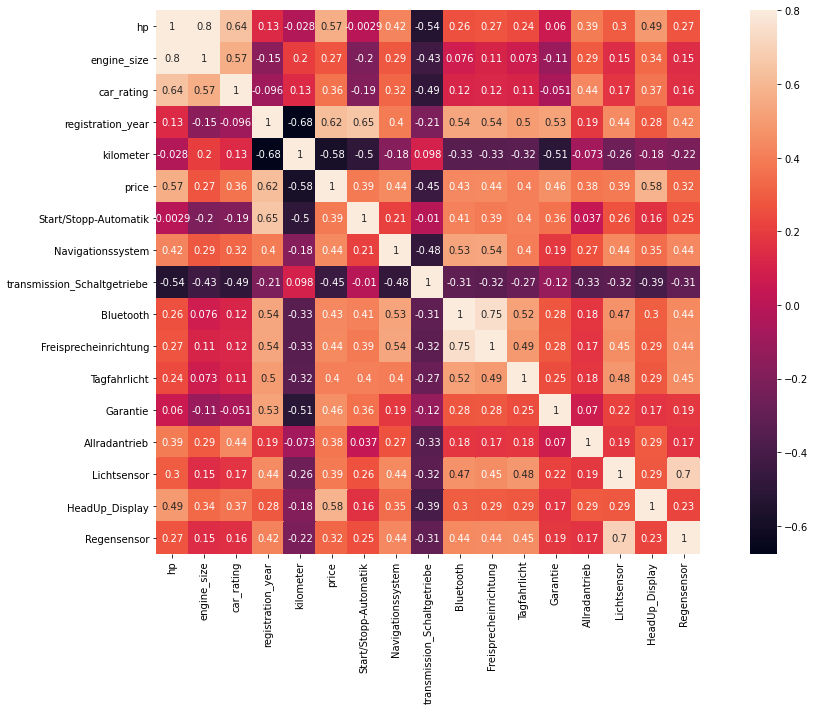

In [27]:
# Show the correlation in a graphical way
figure, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_filtered.corr(), vmax=.8, square=True, annot=True);

In [28]:
df_filtered.describe()

,hp,engine_size,car_rating,registration_year,kilometer,price,Start/Stopp-Automatik,Navigationssystem,transmission_Schaltgetriebe,Bluetooth,Freisprecheinrichtung,Tagfahrlicht,Garantie,Allradantrieb,Lichtsensor,HeadUp_Display,Regensensor
count,23758.000000,23758.000000,23758.000000,23758.000000,2.375800e+04,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000
mean,192.289166,2295.937789,4.030996,2010.130567,1.140075e+05,18673.369097,0.583256,0.635239,0.480175,0.622653,0.657042,0.599756,0.348220,0.214833,0.647487,0.188105,0.740045
std,75.269419,700.022236,0.109635,5.766109,8.209730e+04,15516.778704,0.493030,0.481373,0.499617,0.484733,0.474708,0.489958,0.476416,0.410715,0.477763,0.390804,0.438619
min,7.000000,1.000000,3.900000,1957.000000,0.000000e+00,299.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.000000,1995.000000,3.900000,2007.000000,4.870150e+04,7998.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,177.000000,1995.000000,4.000000,2011.000000,1.070000e+05,14900.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,231.000000,2993.000000,4.100000,2015.000000,1.680000e+05,23990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,761.000000,32993.000000,4.400000,2018.000000,3.201000e+06,189810.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_filtered = df_filtered[df_filtered['hp'] > 10]
df_filtered = df_filtered[df_filtered['engine_size'] > 100]
df_filtered = df_filtered[df_filtered['engine_size'] < 6000]
df_filtered = df_filtered[df_filtered['price'] < 300000]
df_filtered = df_filtered[df_filtered['kilometer'] < 500000]
df_filtered = df_filtered.reset_index(drop=True)

In [30]:
df_filtered.describe()

,hp,engine_size,car_rating,registration_year,kilometer,price,Start/Stopp-Automatik,Navigationssystem,transmission_Schaltgetriebe,Bluetooth,Freisprecheinrichtung,Tagfahrlicht,Garantie,Allradantrieb,Lichtsensor,HeadUp_Display,Regensensor
count,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000,23722.000000
mean,192.259632,2295.712208,4.030664,2010.127350,113711.616474,18651.229702,0.583804,0.634938,0.480609,0.622502,0.657154,0.599486,0.347736,0.214906,0.647247,0.188095,0.739820
std,75.154599,660.835011,0.109171,5.765393,77384.632253,15439.697857,0.492937,0.481458,0.499634,0.484771,0.474671,0.490013,0.476262,0.410766,0.477837,0.390797,0.438742
min,75.000000,195.000000,3.900000,1957.000000,0.000000,299.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.000000,1995.000000,3.900000,2007.000000,48992.500000,7995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,177.000000,1995.000000,4.000000,2011.000000,107000.000000,14900.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,231.000000,2993.000000,4.100000,2015.000000,168000.000000,23990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,761.000000,5972.000000,4.400000,2018.000000,483000.000000,170000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df_filtered.shape

(23722, 17)

<h2>Explorative analysis</h2>

<h3>Numerical variables</h3>

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

(0.0, 178485.05)

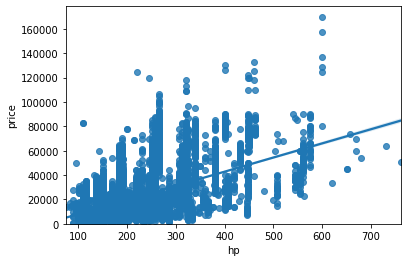

In [32]:
sns.regplot(x='hp', y='price', data=df_filtered)
plt.ylim(0,)

(0.0, 178485.05)

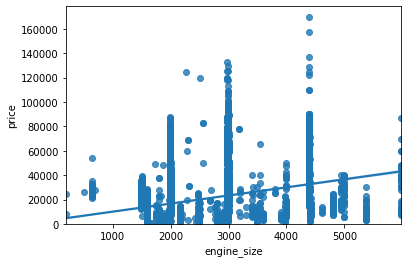

In [33]:
sns.regplot(x='engine_size', y='price', data=df_filtered)
plt.ylim(0,)

(0.0, 179869.3836773316)

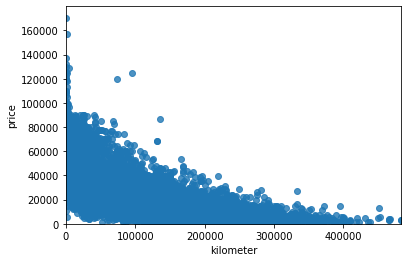

In [34]:
sns.regplot(x='kilometer', y='price', data=df_filtered)
plt.ylim(0,)

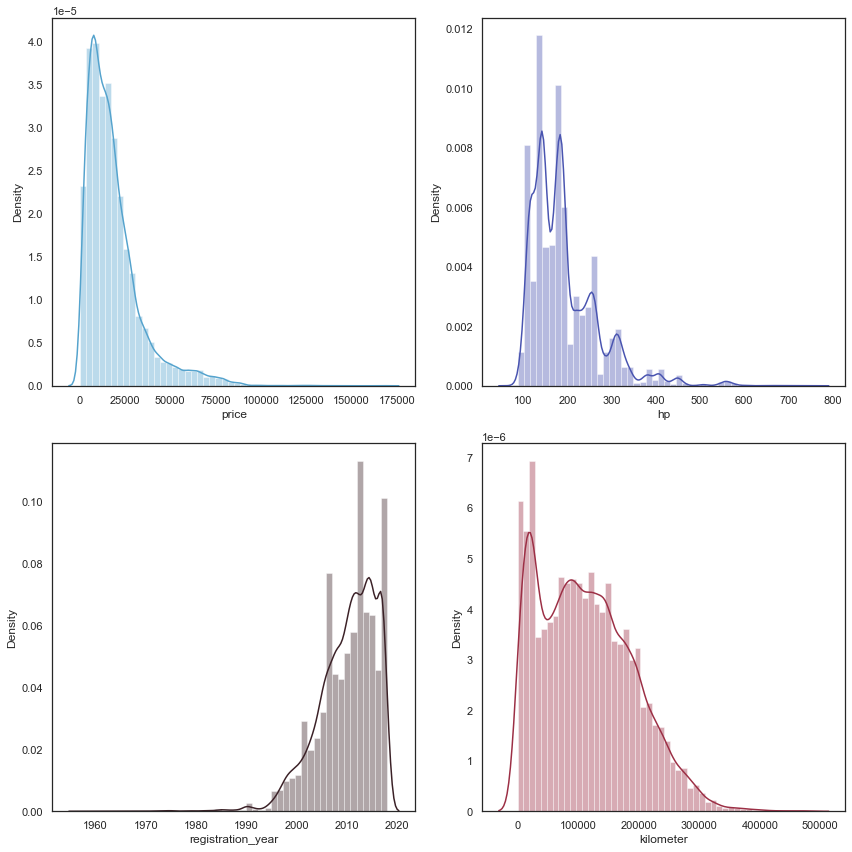

In [35]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.distplot(df_filtered['price'], color=sns.color_palette("icefire")[0], ax=axes[0, 0])
sns.distplot(df_filtered['hp'], color=sns.color_palette("icefire")[1], ax=axes[0, 1])
sns.distplot(df_filtered['registration_year'], color=sns.color_palette("icefire")[3], ax=axes[1, 0])
sns.distplot(df_filtered['kilometer'], color=sns.color_palette("icefire")[4], ax=axes[1, 1])
plt.tight_layout()

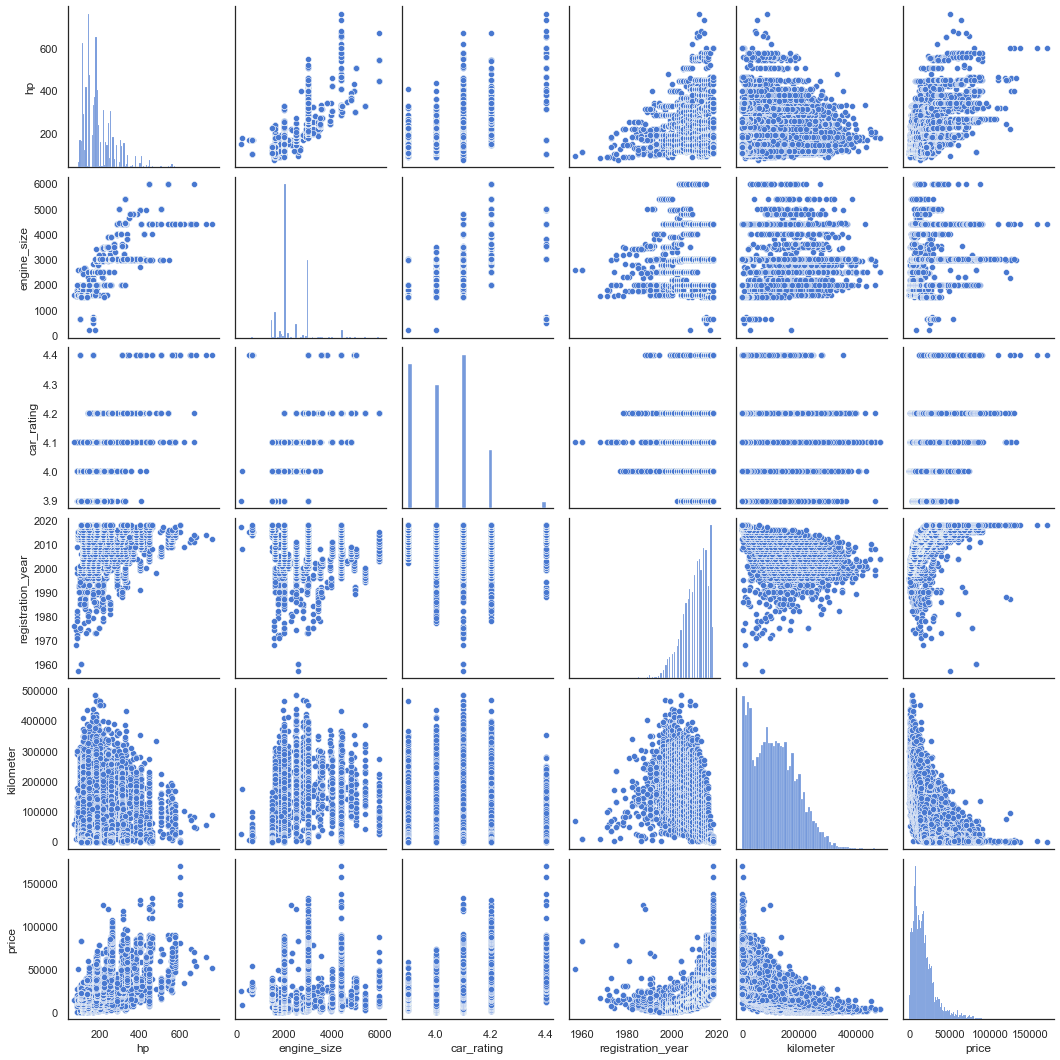

In [36]:
sns.pairplot(df_filtered[['hp', 'engine_size', 'car_rating', 'registration_year', 'kilometer', 'price']])
plt.show()

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


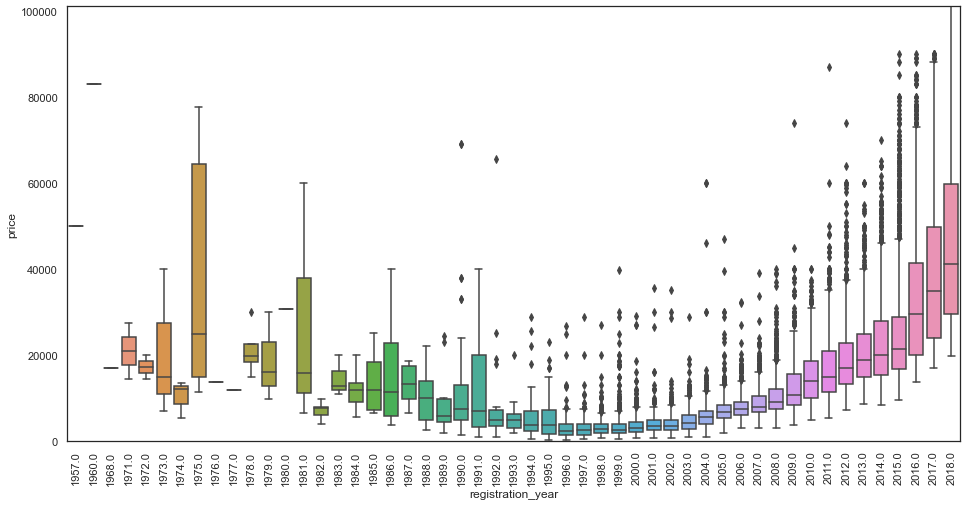

In [37]:
plot_data = pd.concat([df_filtered['price'], df_filtered['registration_year']], axis=1)
figure, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='registration_year', y="price", data=plot_data)
fig.axis(ymin=0, ymax=101000);
plt.xticks(rotation=90);

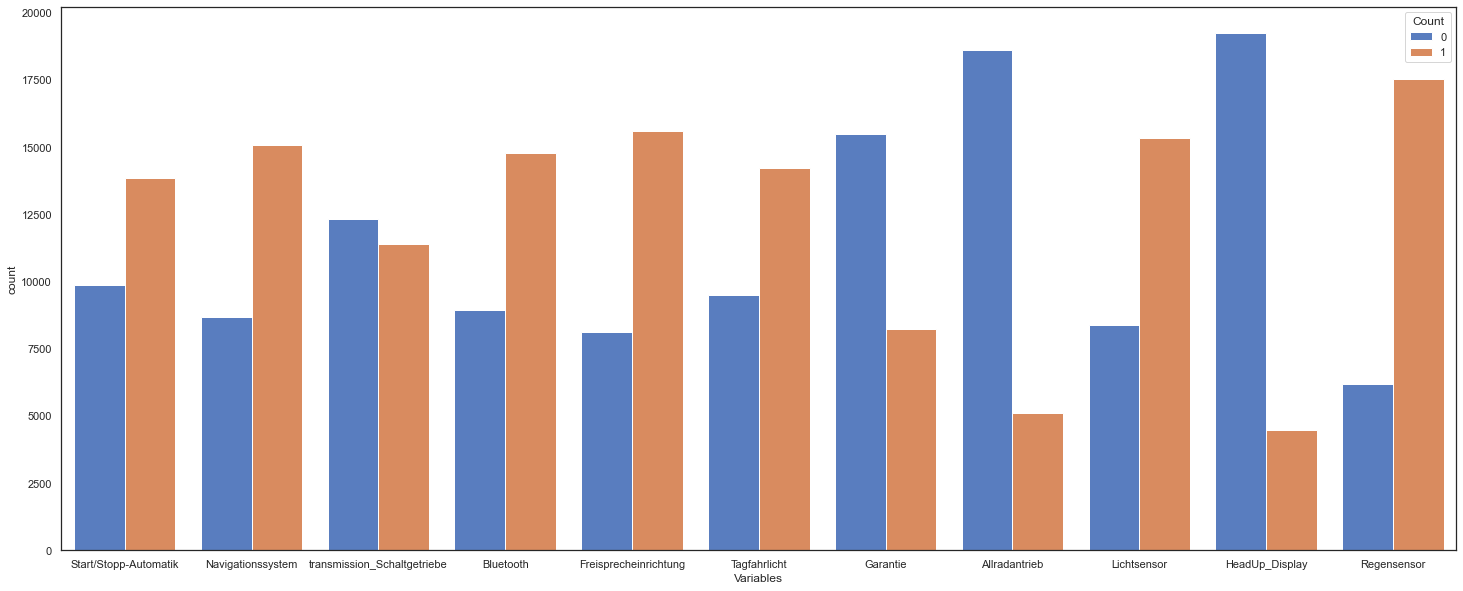

In [38]:
figure, ax = plt.subplots(figsize=(25, 10))
p = sns.countplot(data=pd.melt(df_filtered, id_vars=['hp', 'engine_size', 'car_rating', 'registration_year', 'kilometer', 'price'], var_name='Variables', value_name='Count'), x='Variables', hue='Count')

<h2>Feature scaling</h2>

<!--Especially distance-based classifier like SVM, KNN, and Neural Networks benefit from feature scaling.
Scaling methods affect differently on different classifiers. Distance-based classifiers like SVM, KNN, and MLP(neural network) dramatically benefit from scaling. But even trees (CART, RF), that are agnostic to some of the scaling methods, can benefit from other methods.    
    
    Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
    Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the sc'aler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.
-->
<h3>Standardization</h3>

Standardization means that we rescale the data to have a mean of 0 and a standard deviation of 1.

In [39]:
df_final = df_filtered[['hp', 'engine_size', 'car_rating', 'registration_year', 'kilometer', 'price']]

In [40]:
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(df_final.values)
df_scaled = pd.DataFrame(scaled_features, index=df_final.index, columns=df_final.columns)

<h3>Normalization</h3>

<p>Normalization means the scaling of a variable so the variable values range from 0 to 1.
</p>

In [41]:
normalized_values = preprocessing.normalize(df_scaled.values)
df_normalized = pd.DataFrame(normalized_values, index=df_scaled.index, columns=df_scaled.columns)

<h2>Regression analysis</h2>

<h3>Split data</h3>

In [42]:
X = df_normalized.drop(columns=["price"])
y = df_normalized["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (18977, 5)
Training Labels Shape: (4745, 5)
Testing Features Shape: (18977,)
Testing Labels Shape: (4745,)


<h3>Linear Regression</h3>

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
lin_reg_score = lin_reg.score(X_test, y_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg.predict(X_test))

print('Linear regression R2: ' + str(lin_reg_score))
print('Linear regression MSE: ' + str(lin_reg_mse))
print('Linear regression Coefs: \n', lin_reg.coef_)

Linear regression R2: 0.7470886227455584
Linear regression MSE: 0.0316322712289425
Linear regression Coefs: 
 [ 0.38788435  0.03046179  0.12484038  0.38678231 -0.28192972]


<h3>Polynominal Regression</h3>

In [46]:
poly_feat = PolynomialFeatures(degree = 2)
poly_X_train = poly_feat.fit_transform(X_train)
poly_X_test = poly_feat.fit_transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(poly_X_train, y_train)

LinearRegression()

In [47]:
poly_reg_score = poly_reg.score(poly_X_test, y_test)
poly_reg_mse = mean_squared_error(y_test, poly_reg.predict(poly_X_test))

print('Polynominal regression R2: ' + str(poly_reg_score))
print('Polynominal regression MSE: ' + str(poly_reg_mse))
print('Polynominal regression Coefs: \n', poly_reg.coef_)

Polynominal regression R2: 0.873462161682228
Polynominal regression MSE: 0.015826410285864446
Polynominal regression Coefs: 
 [ 0.          0.33982171  0.0979129   0.12226351  0.52646869 -0.2097957
 -0.92426486  0.28594309  0.17779823 -0.02282619 -0.10490618 -0.93643729
  0.03525662  0.07793236  0.06471384 -0.74270949  0.06059074  0.02970958
 -0.40023765 -0.06704973 -0.63931718]


<h3>Decision Tree</h3>

In [48]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [49]:
dt_score = dt.score(X_test, y_test)
dt_mse = mean_squared_error(y_test, dt.predict(X_test))

print('Decision Tree R2: ' + str(dt_score))
print('Decision Tree MSE: ' + str(dt_mse))
print('Decision Tree Feature Importance: \n', dt.feature_importances_)

Decision Tree R2: 0.9421901600913314
Decision Tree MSE: 0.007230424172863636
Decision Tree Feature Importance: 
 [0.23995311 0.073752   0.07191316 0.53212677 0.08225496]


<h3>Random Forest Regression</h3>

In [50]:
rf = ensemble.RandomForestRegressor(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train);

In [51]:
rf_score = rf.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf.predict(X_test))

print('Random Forest R2: ' + str(rf_score))
print('Random Forest MSE: ' + str(rf_mse))
print('Random Forest Feature Importance: \n', rf.feature_importances_)

Random Forest R2: 0.9655451683205662
Random Forest MSE: 0.00430935370588303
Random Forest Feature Importance: 
 [0.24922409 0.06670917 0.0701667  0.53061107 0.08328897]


<h3>Comparison</h3>

In [52]:
lin_reg_list = [lin_reg_score, lin_reg_mse]
poly_reg_list = [poly_reg_score, poly_reg_mse]
dt_list = [dt_score, dt_mse]
rf_list = [rf_score, rf_mse]
index = ['R2', 'MSE']
df_comparison_data = {'Linear Regression': lin_reg_list, 'Polynominal Regression': poly_reg_list, 'Decision Tree': dt_list, 'Random Forest': rf_list, 'index': index}
df_comparison = pd.DataFrame.from_dict(df_comparison_data).set_index('index')

In [53]:
df_comparison

,Linear Regression,Polynominal Regression,Decision Tree,Random Forest
index,,,,
R2,0.747089,0.873462,0.94219,0.965545
MSE,0.031632,0.015826,0.00723,0.004309
